<a href="https://colab.research.google.com/github/Pradeepp1670/GRIP_Task1/blob/main/GRIP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**
## **GRIP - Graduate Rational Internship Program**
### **#Task1 - Prediction Using Supervised ML**
## **Author:- Pradeep Punjabi**
### Data Science and Business Analytics
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### **Importing Liabraries** 

In [1]:
#importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Uploading Dataset**

In [2]:
data = "http://bit.ly/w-data"
df = pd.read_csv(data)

In [3]:
#first 5 columns of our dataset
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape #shape of data

(25, 2)

### **Data Pre-Processing**

In [6]:
df.isnull().sum()  #checking null value

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


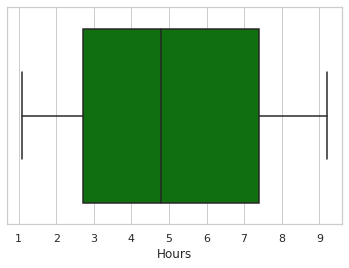

In [8]:
sns.set(style='whitegrid')
sns.boxplot(x='Hours',data=df,color='green')

By Boxplot, we can check the outliersin the data if any..

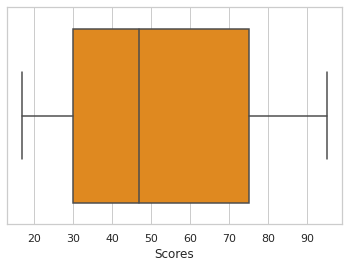

In [9]:
sns.boxplot(x='Scores',data=df, color='darkorange')

Text(0.5, 1.0, 'Hours vs Percentage')

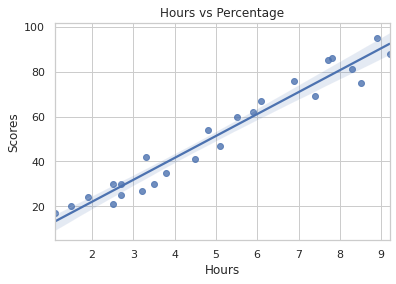

In [10]:
sns.regplot(x='Hours',y='Scores', data= df)
plt.title("Hours vs Percentage")

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Scores and Hours shows correlation of 0.976191 which lead to conclusion that they are highly correlated.

### **Splitting the data into train and test**

In [12]:
X = df.drop('Scores',axis=1)
y = df.drop('Hours',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

### **Fitting data into LinearRegression model**

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Percentage')

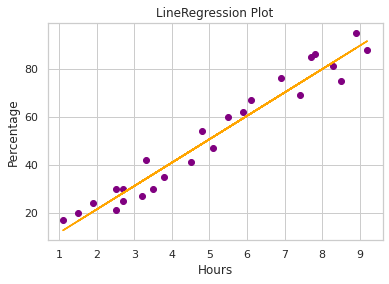

In [15]:
# Plotting the regression line
line = model.coef_ * X + model.intercept_   # Y = MX + B
 
# Plotting for the test data
plt.scatter(X, y, color='purple')
plt.plot(X, line, color='orange')
plt.title('LineRegression Plot')
plt.xlabel("Hours")
plt.ylabel("Percentage")

In [16]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Percentage')

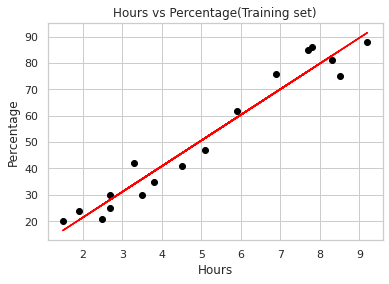

In [17]:
plt.scatter(X_train, y_train, color= 'black')
plt.plot(X_train, model.predict(X_train), color= 'red')
plt.title('Hours vs Percentage(Training set)')
plt.xlabel("Hours")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

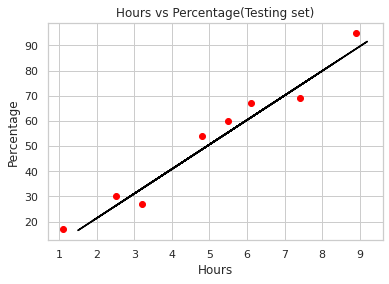

In [18]:
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, model.predict(X_train), color= 'black')
plt.title('Hours vs Percentage(Testing set)')
plt.xlabel("Hours")
plt.ylabel("Percentage")

In [19]:
y_pred = np.ravel(y_pred)  #returns 1-dimensional array elememts with same types as it.

#Comparing the actual data to Predicted Data
pred = pd.DataFrame({'Actual':y_test['Scores'],'Predicted':y_pred})
pred

,Actual,Predicted
19,69,73.992996
18,67,61.321866
16,30,26.232582
21,54,48.650735
14,17,12.586749
2,27,33.055498
7,60,55.473652
15,95,88.613531


### **Evaluating the Model**

In [20]:
from sklearn import metrics
print('Mean absolute error -', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error -', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error -', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error - 5.1461724143681415
Mean squared error - 27.174993129250076
Root Mean squared error - 5.212963948585303


### **Predicting the score for 9.25 hours/day study**

In [21]:
Score = model.predict([[9.25]])
print("Predicted Score = {} %".format(round(Score[0,0],ndigits = 2)))

Predicted Score = 92.02 %


## **So the Predicted Score of a student, studies 9.25 hours/day is 92.02 %**